###**1.  Detect and Match Keypoints Using SIFT**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

array([[107, 106, 106, ...,  89,  89,  89],
       [106, 106, 106, ...,  89,  89,  89],
       [106, 106, 106, ...,  89,  89,  89],
       ...,
       [ 26,  29,  42, ...,  26,  22,  35],
       [ 48,  48,  65, ...,  43,  38,  55],
       [ 59,  42,  52, ..., 102,  74,  60]], dtype=uint8)
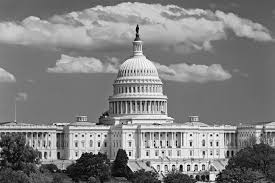

In [7]:
image = cv2.imread("/content/download.jpg", cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found. Please check the file path.")

image

#####**1.1 Apply rotation**

In [3]:
rows, cols = image.shape
matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
rotated_image = cv2.warpAffine(image, matrix, (cols, rows))

#####**1.2. Keypoints detection using SIFT**

In [8]:
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(image, None)
keypoints2, descriptors2 = sift.detectAndCompute(rotated_image, None)

#####**1.3. Matching keypoints**

In [18]:
# Match keypoints using BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
match_img = cv2.drawMatches(image, keypoints1, rotated_image, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#####**1.4. Visualization of the matched keypoints**

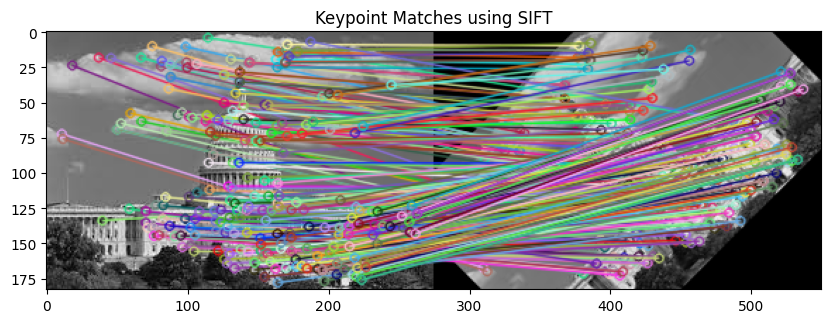

In [6]:
plt.figure(figsize=(10, 5))
plt.imshow(match_img, cmap='gray')
plt.title("Keypoint Matches using SIFT")
plt.show()

###**2.  Find Corners for Image Registration Using Harris Corner Detection**

Done this task on above image

#####**2.1. applying harris corner detection**

In [10]:
gray = np.float32(image)
corner_map = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate the corner map to enhance visibility
corner_map = cv2.dilate(corner_map, None)

#####**2.2. Mark harris corners**

In [11]:
# Threshold for an optimal value to detect strong corners
image_with_corners = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
image_with_corners[corner_map > 0.01 * corner_map.max()] = [0, 0, 255]

#####**2.3. Display the corners on image**

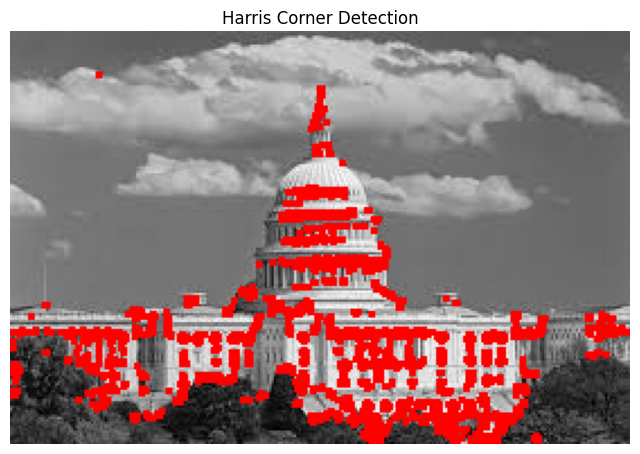

In [13]:
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis("off")
plt.show()

###**3. Edge Detection for Object Boundary Identification Using Canny Edge Detection**

Performed on above image

#####**3.1. Applying gaussian Blur to reduce noise**

In [14]:
blurred = cv2.GaussianBlur(image, (5, 5), 1.5)

#####**3.2. Applying canny edge detection**

In [15]:
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

#####**3.3. Displaying orignal and edge detected image**

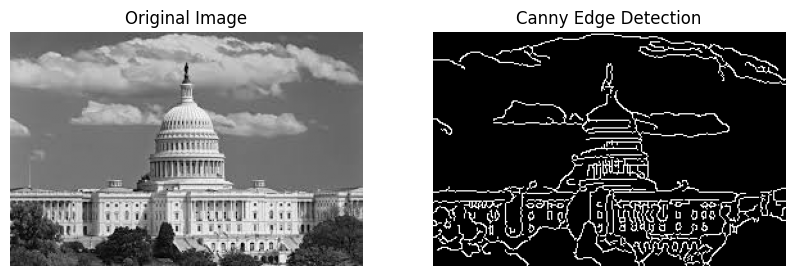

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")

plt.show()